<a href="https://colab.research.google.com/github/FSNLSTR/PythonProjects/blob/main/MLSP_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P1: MLE and MAP**

Part 1-4
MLE value

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Prof. M's observed data
observations = np.array([1, 3, 2, 0, 2, 4, 3, 2, 3, 4, 0, 1, 1, 3, 3, 2, 1, 1, 4, 3, 1, 1, 1, 1, 1, 2, 5, 2, 0, 1, 3, 0, 4, 2, 1])

# MLE for the Poisson parameter
mle = np.mean(observations)

print(f"MLE: {mle}")

MLE: 1.9428571428571428


Part 5

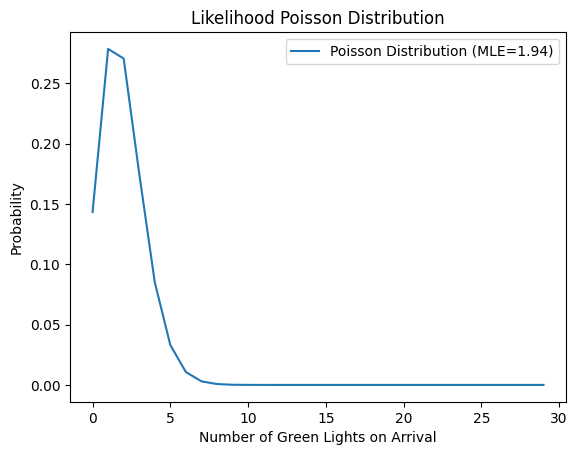

In [ ]:
# Generating the Poisson distribution
xs_poisson = np.arange(0, 30)
ys_poisson = poisson.pmf(xs_poisson, mle)

# Plotting likelihood Poisson distribution
plt.plot(xs_poisson, ys_poisson, label=f'Poisson Distribution (MLE={mle:.2f})')
plt.title('Likelihood Poisson Distribution')
plt.xlabel('Number of Green Lights on Arrival')
plt.ylabel('Probability')
plt.legend()
plt.show()

Part 6

In [ ]:
# Calculating MLE parameter log likelihood
log_likelihood_mle = np.sum(poisson.logpmf(observations, mle))

# Calculating the log likelihood for more parameters
other_parameters = [1, 2, 3, 4, 5]
log_likelihood_values = []

for param in other_parameters:
    log_likelihood = np.sum(poisson.logpmf(observations, param))
    log_likelihood_values.append(log_likelihood)

# Display results
print(f"Log Likelihood for MLE parameter ({mle:.2f}): {log_likelihood_mle}")
for param, log_likelihood in zip(other_parameters, log_likelihood_values):
    print(f"Log Likelihood for parameter {param}: {log_likelihood}")

Log Likelihood for MLE parameter (1.94): -57.73119784199471
Log Likelihood for parameter 1: -69.89405361268983
Log Likelihood for parameter 2: -57.760045334613544
Log Likelihood for parameter 3: -65.18841798325836
Log Likelihood for parameter 4: -80.62603705653727
Log Likelihood for parameter 5: -100.45227556717101


Part 7-8

In [ ]:
from scipy.stats import poisson, gamma

# Prof. M's friend's observed data
friend_observations = 300
total_rides_friend = 100

# Calculate parameters for the Gamma distribution (conjugate prior)
alpha = friend_observations
beta = total_rides_friend

# Calculate the posterior parameters
posterior_alpha = np.sum(observations) + alpha
posterior_beta = len(observations) + beta

# Calculate the posterior mean (maximum-a-posterior mean)
posterior_mean = posterior_alpha / posterior_beta

# Display results
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print()
print(f"Posterior Alpha: {posterior_alpha}")
print(f"Posterior Beta: {posterior_beta}")
print(f"Posterior mean: {posterior_mean}")

Alpha: 300
Beta: 100

Posterior Alpha: 368
Posterior Beta: 135
Posterior mean: 2.725925925925926


Part 9

MAP estimate: 2.725925925925926


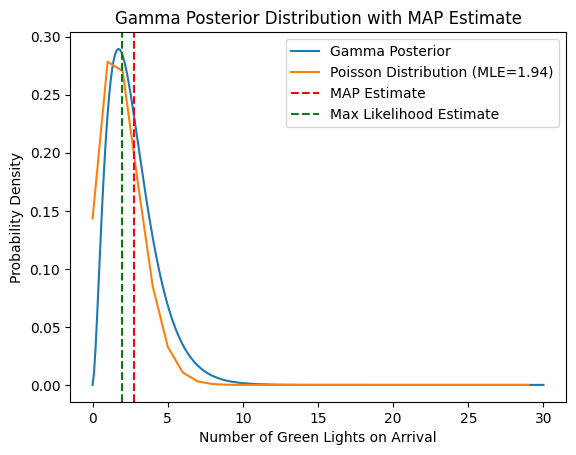

In [ ]:
# Generate the Poisson likelihood and Gamma prior distributions
# Calculate MAP estimate
map_estimate = posterior_mean
print(f"MAP estimate: {map_estimate}")

# Generate the Gamma posterior distribution
xs = np.linspace(0, 30, 300)
ys = gamma.pdf(xs, posterior_mean)

# Plot the posterior distribution with the MAP estimate
plt.plot(xs, ys, label='Gamma Posterior')
plt.plot(xs_poisson, ys_poisson, label=f'Poisson Distribution (MLE={mle:.2f})')
plt.axvline(x=map_estimate, color='red', linestyle='--', label='MAP Estimate')
plt.axvline(x=mle, color='green', linestyle='--', label='Max Likelihood Estimate')


plt.title('Gamma Posterior Distribution with MAP Estimate')
plt.xlabel('Number of Green Lights on Arrival')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**P2: Central Limit Theorum**

In [ ]:
import librosa

# Importing data
x1, sr_x1 = librosa.load('x1.wav', sr=None)
x2, sr_x2 = librosa.load('x2.wav', sr=None)
s, sr_s = librosa.load('s.wav', sr=None)

# Sample Mean and Sample Std Deviation
sample_mean_x1, sample_sd_x1 = np.mean(x1), np.std(x1)
sample_mean_x2, sample_sd_x2 = np.mean(x2), np.std(x2)
sample_mean_s, sample_sd_s = np.mean(s), np.std(s)

# Standardizing data
x1_std = (x1-sample_mean_x1)/sample_sd_x1
x2_std = (x2-sample_mean_x2)/sample_sd_x2
s_std = (s-sample_mean_s)/sample_sd_s

In [ ]:
from scipy.stats import kurtosis

# Calculate kurtosis
x1_kurtosis = np.mean(x1_std**4) - 3
x2_kurtosis = np.mean(x2_std**4) - 3
s_kurtosis = np.mean(s_std**4) - 3

print(f"X1 Kurtosis: {x1_kurtosis}")
print(f"X2 Kurtosis: {x2_kurtosis}")
print(f"S Kurtosis: {s_kurtosis}")

X1 Kurtosis: 4.907141208648682
X2 Kurtosis: 3.8733277320861816
S Kurtosis: 7.293442726135254


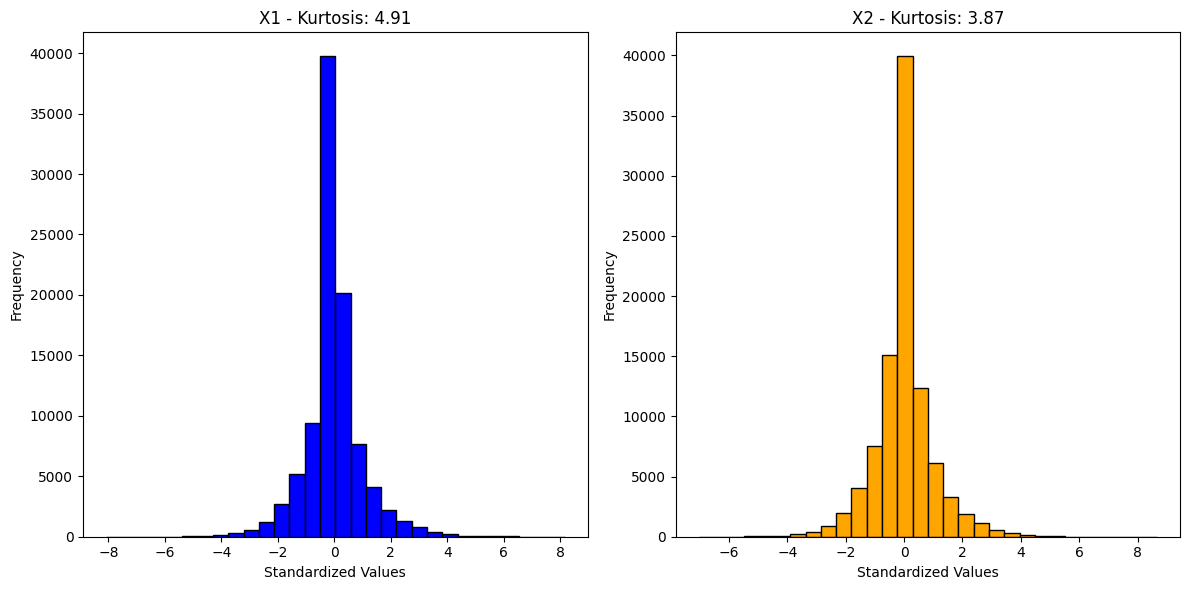

In [ ]:
# Draw histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(x1_std, color='blue', bins = 30, edgecolor='black')
plt.title(f'X1 - Kurtosis: {x1_kurtosis:.2f}')
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x2_std, color='orange', bins = 30, edgecolor='black')
plt.title(f'X2 - Kurtosis: {x2_kurtosis:.2f}')
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

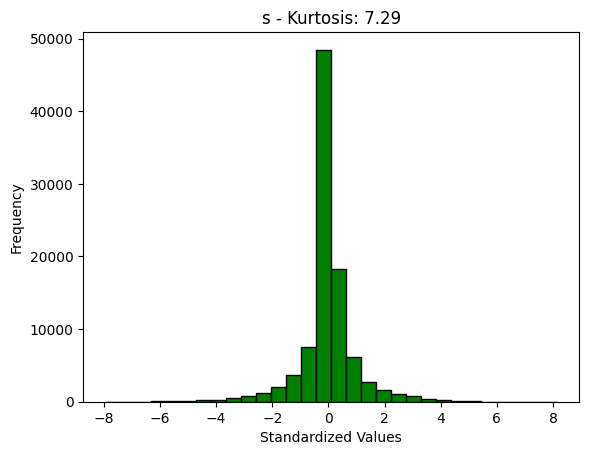

In [ ]:
# S Histogram
plt.hist(s_std, color='green', bins = 30, edgecolor='black', )
plt.title(f's - Kurtosis: {s_kurtosis:.2f}')
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.show()

The kurtosis value of s.wav (7.29) indicates that it has a distribution with higher peakedness and heavier tails compared to a Gaussian distribution. This suggests that the ground-truth speech signal contains complex and non-Gaussian characteristics. X1.wav has a kurtosis value of 4.91, which is lower than that of s.wav. This indicates that X1.wav is closer to a Gaussian distribution compared to s.wav, suggesting that it has fewer interfering sources compared to s.wav. X2.wav has a kurtosis value of 3.87, which is the lowest among the three signals. This indicates that X2.wav is closer to a Gaussian distribution compared to both s.wav and X1.wav. Therefore, X2.wav likely has fewer interfering sources compared to both s.wav and X1.wav.

Part 12: Verbal explanation

**Part 3: Eigenvectors for Two-Notes**
Power Iteration Routine

In [ ]:
def power_iteration(matrix, vector):

  # Multiply the matrix by the current vector
  matrix_vector_product = np.dot(matrix, vector)

  # Normalize the resulting vector
  vector = (matrix_vector_product) / matrix_vector_product[len(matrix_vector_product)-1]

  return vector

In [ ]:
def power_iteration2(matrix, vector):
    max_runs = 1000
    run = 0
    alpha = 0.01

    while run <= max_runs:
        lambda_diff = 2 * np.dot(matrix, vector)
        vector = vector +(alpha * lambda_diff)
        vector = vector/np.sqrt(np.sum(vector**2))
        run += 1

    return lambda_diff, vector

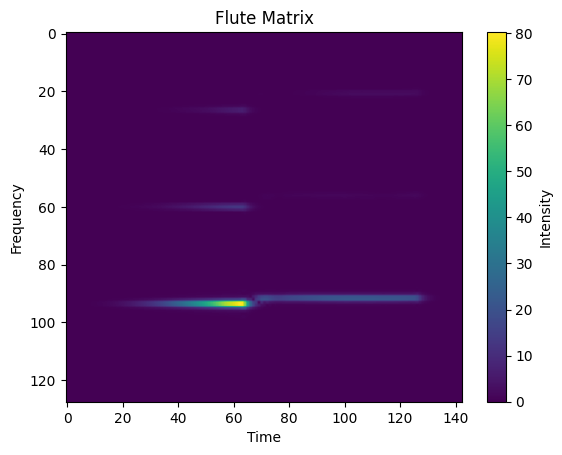

In [ ]:
import scipy.io
X = scipy.io.loadmat('flute.mat')['X']

# Plot the matrix using a colormap
plt.imshow(X, cmap='viridis', aspect='auto')
plt.title('Flute Matrix')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Intensity')
plt.show()

In [ ]:
# Estimate the first eigenvector
xxT = X @ X.T

# Initialize a random vector as the starting point
weight1 = np.random.rand(xxT.shape[0])
weight1 = weight1/np.sqrt(np.sum(weight1**2))
weight1 = weight1.reshape(-1,1)

eig_val1, weight1 = power_iteration2(xxT, weight1)
print('The first eigen vector shape is: ' + str(weight1.shape))

The first eigen vector shape is: (128, 1)


In [ ]:
# Estimate the first eigenvector
xxT = X @ X.T

# Initialize a random vector as the starting point
weight2 = np.random.rand(xxT.shape[0])
weight2 = weight2/np.sqrt(np.sum(weight2**2))
weight2 = weight1.reshape(-1,1)

eig_val1, weight1 = power_iteration2(xxT, weight2)
print('The second eigen vector shape is: ' + str(weight2.shape))

The second eigen vector shape is: (128, 1)


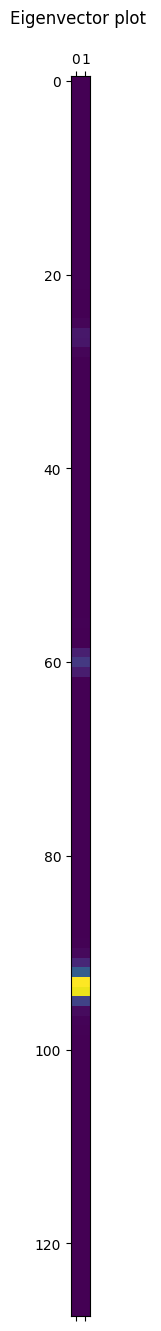

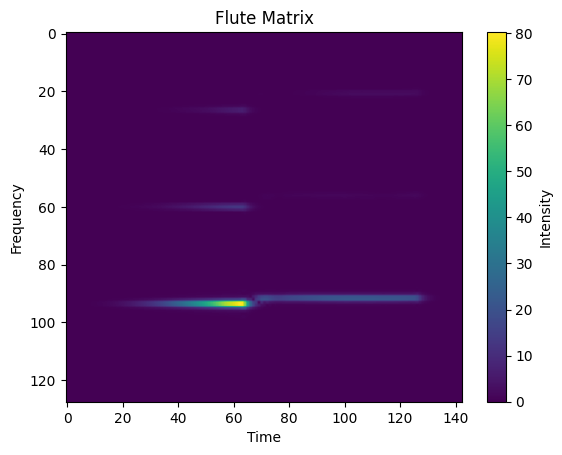

In [ ]:
vector_concat = np.concatenate((weight1.reshape(-1,1), weight2.reshape(-1,1)),axis=1)
plt.matshow(vector_concat)
plt.title("Eigenvector plot \n")
plt.grid(False)
plt.show()

plt.imshow(X, cmap='viridis', aspect='auto')
plt.title('Flute Matrix')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Intensity')
plt.show()

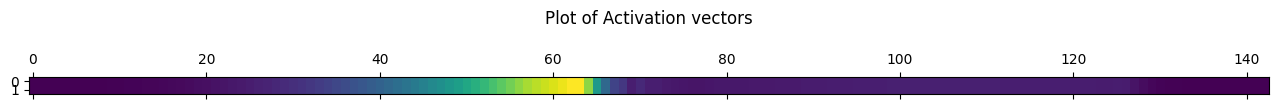

In [ ]:
#calculating temporal activation
temporal_activation = vector_concat.T @ X

plt.matshow(temporal_activation)
plt.title("Plot of Activation vectors\n")
plt.grid(False)
plt.show()

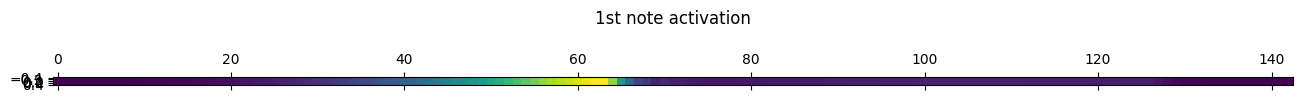

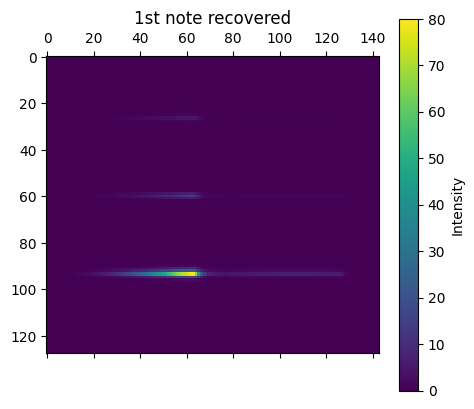

In [ ]:
temporal_activation_1 = temporal_activation[:1]
plt.matshow(temporal_activation_1)
plt.title('1st note activation\n')
plt.show()

t1 = weight1 @ temporal_activation_1
plt.matshow(t1)
plt.title("1st note recovered")
plt.colorbar(label='Intensity')
plt.show()

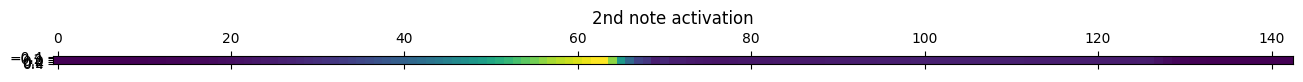

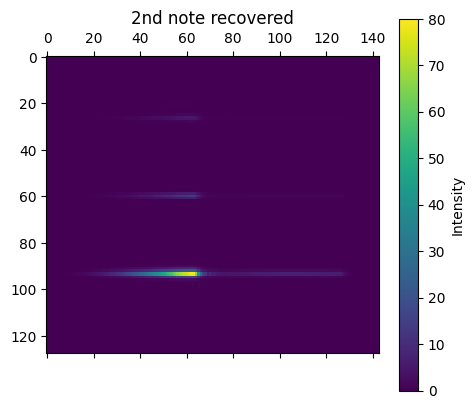

In [ ]:
temporal_activation_2 = temporal_activation[1:2]
plt.matshow(temporal_activation_2, interpolation = None)
plt.title('2nd note activation')
plt.show()

t2 = weight1 @ temporal_activation_2
plt.matshow(t2)
plt.title("2nd note recovered")
plt.colorbar(label='Intensity')
plt.show()

**P4: BFGS**

In [ ]:
import os
from scipy import io
import cv2
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

[[0.42745098 0.25098039 0.71764706 ... 0.02745098 0.01960784 0.09411765]
 [0.44705882 0.43529412 0.62745098 ... 0.05098039 0.01568627 0.01176471]
 [0.31372549 0.3254902  0.43529412 ... 0.15686275 0.18431373 0.16862745]
 ...
 [0.24313725 0.38039216 0.54509804 ... 0.30196078 0.38823529 0.31764706]
 [0.17254902 0.18823529 0.30588235 ... 0.45098039 0.38039216 0.45490196]
 [0.30196078 0.18823529 0.09019608 ... 0.51372549 0.41568627 0.40392157]]
(200, 200)


Text(0.5, 1.0, 'Test Image (Input)')

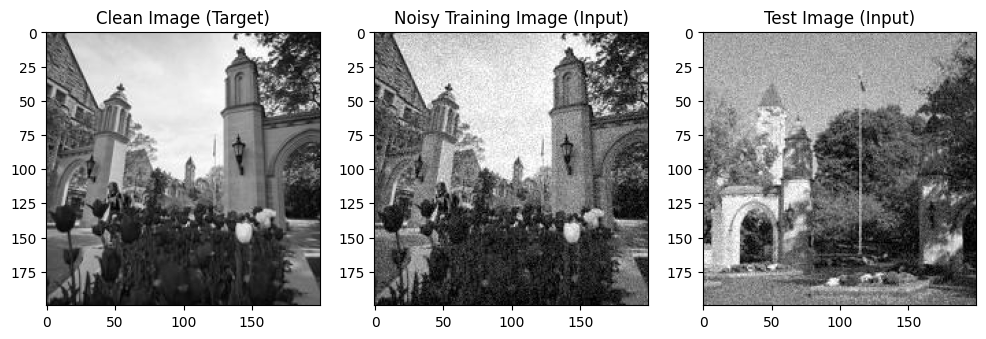

In [ ]:
sg_train = cv2.imread('sg_train.jpg', cv2.IMREAD_GRAYSCALE)/255.0
sgx_train = cv2.imread('sgx_train.jpg', cv2.IMREAD_GRAYSCALE)/255.0
sgx_test = cv2.imread('sgx_test.jpg', cv2.IMREAD_GRAYSCALE)/255.0

print(sgx_train)
print(sgx_train.shape)


# Display the original images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sg_train, cmap='gray')
plt.title('Clean Image (Target)')

plt.subplot(1, 3, 2)
plt.imshow(sgx_train, cmap='gray')
plt.title('Noisy Training Image (Input)')

plt.subplot(1, 3, 3)
plt.imshow(sgx_test, cmap='gray')
plt.title('Test Image (Input)')


In [ ]:
def vectorize_image(image, patch_size, shift):
    patches = []
    for i in range(0, image.shape[0] - patch_size + 1, shift):
        for j in range(0, image.shape[1] - patch_size + 1, shift):
            patch = image[i:i+patch_size, j:j+patch_size].flatten()
            patches.append(patch)
    return np.array(patches).T



X_train = vectorize_image(sgx_train, 15, 1)
print(X_train.shape)

(225, 34596)


In [ ]:
def target_crop(image, patch_size):
    border_size = (patch_size - 1) // 2

    middle_pixels = []
    for i in range(image.shape[0] - patch_size + 1):
        for j in range(image.shape[1] - patch_size + 1):
            patch = image[i:i+patch_size, j:j+patch_size]
            middle_pixel = patch[border_size, border_size]
            middle_pixels.append(middle_pixel)

    return np.array(middle_pixels)

patch_size = 15
image = sg_train
s = target_crop(image, patch_size)
print(image)
print(s)
print("Extracted patches shape:", s.shape)

[[0.41176471 0.37254902 0.56862745 ... 0.05882353 0.05098039 0.06666667]
 [0.35294118 0.43137255 0.59607843 ... 0.07843137 0.05882353 0.0627451 ]
 [0.38431373 0.34901961 0.47843137 ... 0.08235294 0.0745098  0.0745098 ]
 ...
 [0.16078431 0.36470588 0.44705882 ... 0.38823529 0.38823529 0.38823529]
 [0.12941176 0.22352941 0.30980392 ... 0.39215686 0.39215686 0.39215686]
 [0.1254902  0.08235294 0.14901961 ... 0.39607843 0.39607843 0.4       ]]
[0.43529412 0.44313725 0.30196078 ... 0.38039216 0.44313725 0.42352941]
Extracted patches shape: (34596,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
  return 1 / (1 + np.exp(-x))

def g_der(x):
  g_x = g(x)
  return g_x * (1 - g_x)

def cost_function(f, X, s):
  f_X = f.T @ X
  g_f_X = g(f_X)
  return (1 / len(s)) * ((s.T - g_f_X) @ (s.T - g_f_X).T)

def cost_gradient(f, X, s):
  f_X = f.T @ X
  g_f_X = g(f_X)
  gder_f_X = g_der(f_X)
  return (-2/len(s)) * X @ ((s.T - g_f_X) * gder_f_X).T

In [ ]:
def gradient_descent(X, s, learning_rate=0.1, tolerance=1e-6, max_iter = 2000):
  f = np.random.rand(X.shape[0])/255.0
  cost_history = []

  for _ in range(num_iterations):

    # Compute the negative gradient of the cost function
    #partial_differentiation = (-2/len(s)) * X @ (k * gder_f_X).T
    partial_differentiation = cost_gradient(f, X, s)
    gradient = -partial_differentiation

    # Update the denoising filter using the negative gradient
    f = f + (learning_rate * gradient)

    # Compute the current cost
    error = cost_function(f, X, s)
    cost_history.append(error)

    # Check for convergence
    if error < tolerance:
        break

  return f, cost_history

In [ ]:
def BFGS_optimizer(X, s, tolerance=1e-6, max_iter = 2000):
  # Initialize the denoising filter with random values
  f = np.random.rand(X.shape[0]).reshape(-1,1)/225.0

  # Initialize G as the inverse Hessian approximation
  G = np.identity(X.shape[0])

  # Initialize the cost history
  cost_history = []

  # Compute the negative gradient of the cost function
  gradient = -cost_gradient(f, X, s)

  # Iterate until convergence or maximum iterations reached
  for _ in range(max_iter):
    # Update the filter using the BFGS update formula
    f_new = f - (G @ gradient)

    # Compute the change in filter and gradient
    p = f_new - f # (225,)
    f_new_gradient = -cost_gradient(f_new, X, s)

    v = f_new_gradient - gradient # (225, )

    # Compute u
    pTv = (p.T @ v) # scalar
    Gv = (G @ v) # (225, )
    vTGv = (v.T @ Gv) # scalar

    u = (p / pTv) - (Gv / vTGv) # (225, )

    # Update the inverse Hessian approximation using the BFGS update formula
    one = ((p @ p.T) / pTv) # (225, 225)

    two =  (Gv * (v.T @ G)) / vTGv # (255, )

    three = (vTGv) * (u @ u.T) # (255, 255)

    G = G + (one - two + three) # (255, 255)

    # Update the filter
    f = f_new
    gradient = f_new_gradient

    # Compute the current cost
    error = cost_function(f, X, s)[0][0]
    cost_history.append(error)

  return f, cost_history

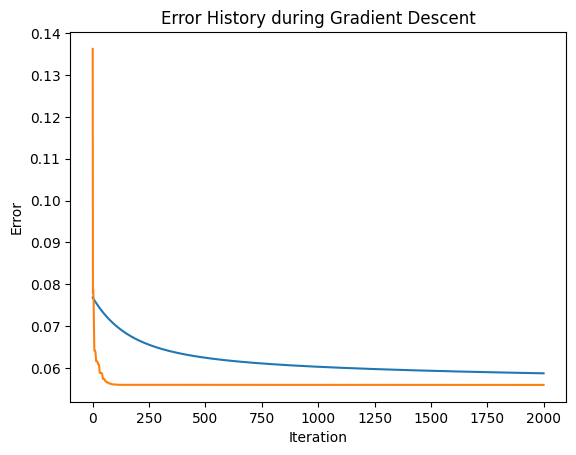

In [ ]:
learning_rate = 0.1
tolerance = 1e-6
num_iterations = 2000

gradient_denoising_filter, gradient_cost_history = gradient_descent(X_train, s, learning_rate, tolerance, num_iterations)
bfgs_denoising_filter, bfgs_cost_history = BFGS_optimizer(X_train, s, tolerance, num_iterations)

# Plot the cost history over iterations
plt.plot(gradient_cost_history)
plt.plot(bfgs_cost_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error History during Gradient Descent')
plt.show()

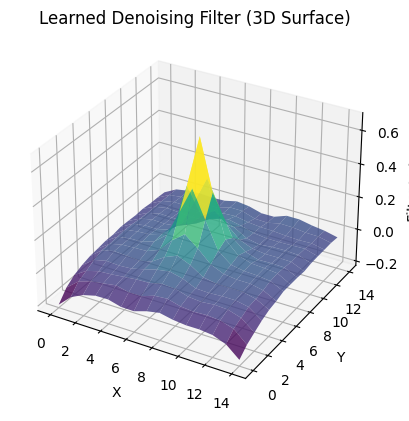

In [ ]:
filter_image = gradient_denoising_filter.reshape((15, 15))

# Create a 2D grid of coordinates
x, y = np.meshgrid(np.arange(0, patch_size), np.arange(0, patch_size))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(x, y, filter_image, cmap='viridis', rstride=1, cstride=1, alpha=0.8)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Filter Value')

# Show the plot
plt.title('Learned Denoising Filter (3D Surface)')
plt.show()

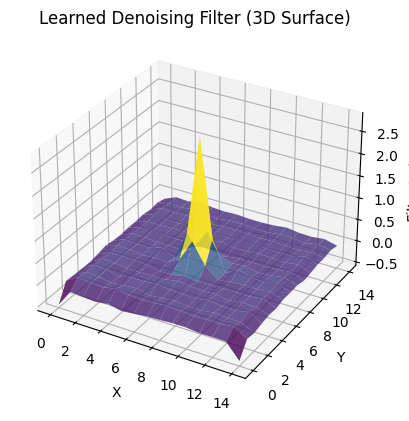

In [ ]:
filter_image = bfgs_denoising_filter.reshape((15, 15))

# Create a 2D grid of coordinates
x, y = np.meshgrid(np.arange(0, patch_size), np.arange(0, patch_size))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(x, y, filter_image, cmap='viridis', rstride=1, cstride=1, alpha=0.8)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Filter Value')

# Show the plot
plt.title('Learned Denoising Filter (3D Surface)')
plt.show()

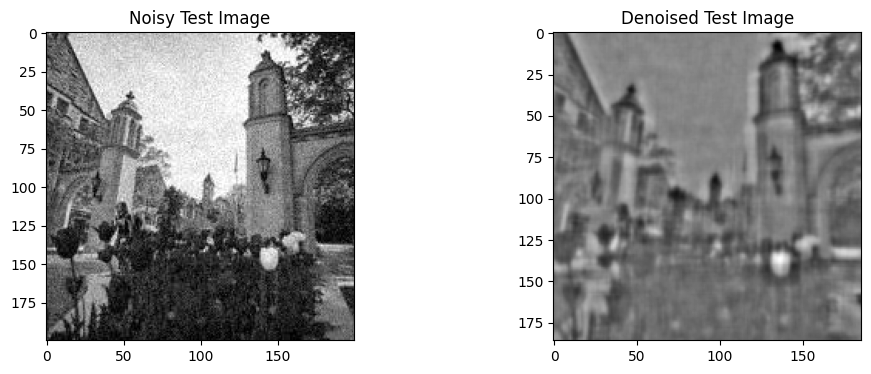

In [ ]:
# Assuming denoising_filter is obtained from gradient descent
denoised_train = (gradient_denoising_filter.T @ X_train)
denoised_train = denoised_train.reshape((186, 186))

# Display the denoised images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(sgx_train, cmap='gray')
plt.title('Noisy Test Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_train, cmap='gray')
plt.title('Denoised Test Image')

plt.show()

(225, 34596)
(34596,)


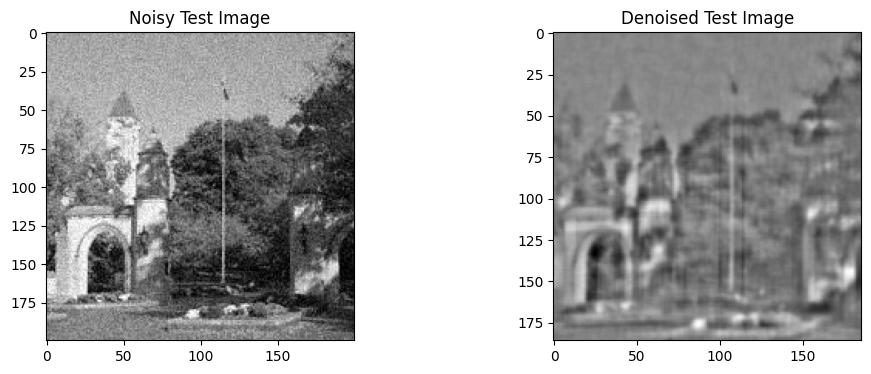

In [ ]:
X_test = vectorize_image(sgx_test, patch_size, 1)
print(X_test.shape)

# Assuming denoising_filter is obtained from gradient descent
denoised_test = (gradient_denoising_filter.T @ X_test)
print(denoised_test.shape)
denoised_test = denoised_test.reshape((186, 186))

# Display the denoised images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(sgx_test, cmap='gray')
plt.title('Noisy Test Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_test, cmap='gray')
plt.title('Denoised Test Image')

plt.show()

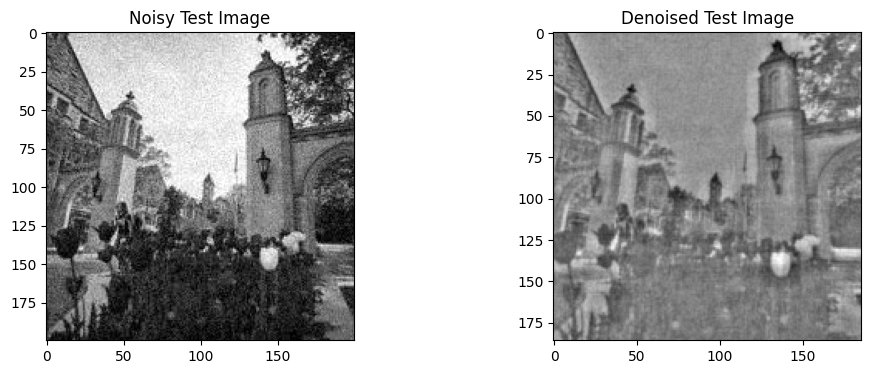

In [ ]:
# Assuming denoising_filter is obtained from gradient descent
denoised_train = (bfgs_denoising_filter.T @ X_train)
denoised_train = denoised_train.reshape((186, 186))

# Display the denoised images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(sgx_train, cmap='gray')
plt.title('Noisy Test Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_train, cmap='gray')
plt.title('Denoised Test Image')

plt.show()

(225, 34596)
(1, 34596)


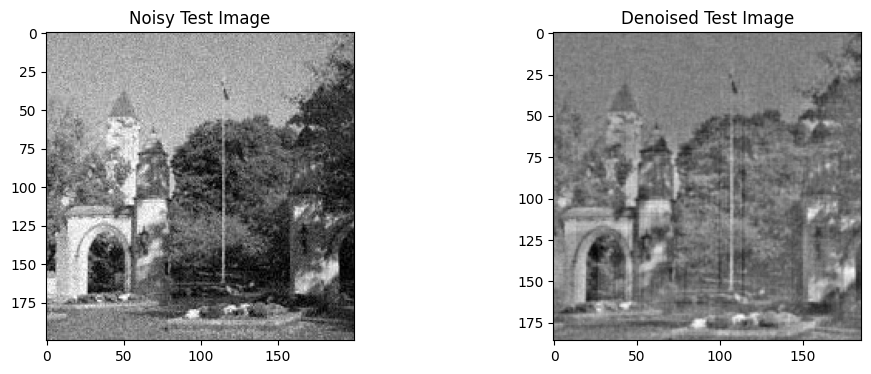

In [ ]:
X_test = vectorize_image(sgx_test, patch_size, 1)
print(X_test.shape)

# Assuming denoising_filter is obtained from gradient descent
denoised_test = (bfgs_denoising_filter.T @ X_test)
print(denoised_test.shape)
denoised_test = denoised_test.reshape((186, 186))

# Display the denoised images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(sgx_test, cmap='gray')
plt.title('Noisy Test Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_test, cmap='gray')
plt.title('Denoised Test Image')

plt.show()